In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

Importing the dataaset

In [2]:
meteorite_data  = pd.read_csv('Meteorite Landings.csv')

pd.set_option('display.float_format', '{:.2f}'.format)
#Disable SettingWithCopyWarning: 
pd.options.mode.chained_assignment = None
meteorite_data


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.00,Fell,1880.00,50.77,6.08,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.00,Fell,1951.00,56.18,10.23,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.00,Fell,1952.00,54.22,-113.00,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.00,Fell,1976.00,16.88,-99.90,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.00,Fell,1902.00,-33.17,-64.95,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.00,Found,1990.00,29.04,17.02,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.00,Found,1999.00,13.78,8.97,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.30,Found,1939.00,49.25,17.67,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.00,Found,2003.00,49.79,41.50,"(49.78917, 41.5046)"


Cleansing the dataset

In [3]:
#Check each column for missing values
for column in meteorite_data.columns:
    missing_values = meteorite_data[column].isnull().sum()
    print(column, missing_values)

len(meteorite_data)

name 0
id 0
nametype 0
recclass 0
mass (g) 131
fall 0
year 291
reclat 7315
reclong 7315
GeoLocation 7315


45716

In [4]:
#remove all data points where year and mass is missing
meteorite_data_clean =meteorite_data.dropna(subset=['year','mass (g)'])

#Drop all relict data points with 0 mass
meteorite_data_clean = meteorite_data_clean[meteorite_data_clean['mass (g)'] > 0]

#datatype of each column
meteorite_data_clean

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.00,Fell,1880.00,50.77,6.08,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.00,Fell,1951.00,56.18,10.23,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.00,Fell,1952.00,54.22,-113.00,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.00,Fell,1976.00,16.88,-99.90,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.00,Fell,1902.00,-33.17,-64.95,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.00,Found,1990.00,29.04,17.02,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.00,Found,1999.00,13.78,8.97,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.30,Found,1939.00,49.25,17.67,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.00,Found,2003.00,49.79,41.50,"(49.78917, 41.5046)"


Descriptive Analysis

In [5]:
#print each column and the distinct values in them
for column in meteorite_data_clean.columns:
    unique_values = list(meteorite_data_clean[column].unique())
    print(column, len(unique_values))
#statistical summary of meteorite data
summary  = meteorite_data_clean[['mass (g)', 'year', 'reclat', 'reclong']].describe()
summary

name 45291
id 45291
nametype 2
recclass 457
mass (g) 12541
fall 2
year 253
reclat 12601
reclong 14473
GeoLocation 16906


,mass (g),year,reclat,reclong
count,45291.00,45291.00,38096.00,38096.00
mean,13320.55,1991.97,-39.64,61.33
std,576841.31,23.93,46.14,80.79
min,0.01,860.00,-87.37,-165.43
25%,7.15,1987.00,-76.72,0.00
50%,32.18,1998.00,-71.50,35.67
75%,200.15,2003.00,0.00,157.17
max,60000000.00,2101.00,81.17,178.20


In [6]:
#Check invalid years 
meteorite_data_clean[meteorite_data_clean['year']>2024]



,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
30682,Northwest Africa 7701,57150,Valid,CK6,55.00,Found,2101.00,0.00,0.00,"(0.0, 0.0)"


In [7]:
#Looked up the data online and found the year was actually 2010. Replacing 2101 with 2010
meteorite_data_clean['year'] = meteorite_data_clean['year'].replace(2101.0, 2010.0)

meteorite_data_clean[['mass (g)', 'year', 'reclat', 'reclong']].describe()


,mass (g),year,reclat,reclong
count,45291.00,45291.00,38096.00,38096.00
mean,13320.55,1991.97,-39.64,61.33
std,576841.31,23.92,46.14,80.79
min,0.01,860.00,-87.37,-165.43
25%,7.15,1987.00,-76.72,0.00
50%,32.18,1998.00,-71.50,35.67
75%,200.15,2003.00,0.00,157.17
max,60000000.00,2013.00,81.17,178.20


In [8]:
#Print all relict data points
meteorite_data_clean[meteorite_data_clean['nametype'] == 'Relict']

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
6818,David Glacier 92308,6614,Relict,Chondrite-fusion crust,1.70,Found,1992.00,-75.32,162.00,"(-75.31667, 162.0)"
17756,LaPaz Icefield 031037,35780,Relict,Fusion crust,0.10,Found,2003.00,NaN,NaN,NaN
18657,LaPaz Icefield 04531,34986,Relict,Chondrite-fusion crust,0.01,Found,2004.00,NaN,NaN,NaN
18770,LaPaz Icefield 04644,34999,Relict,Chondrite-fusion crust,0.63,Found,2004.00,NaN,NaN,NaN
20679,Lewis Cliff 87241,13702,Relict,Chondrite-fusion crust,0.50,Found,1987.00,-84.35,161.31,"(-84.34563, 161.31058)"
23094,Meteorite Hills 001139,45809,Relict,Fusion crust,0.01,Found,2000.00,-79.68,159.75,"(-79.68333, 159.75)"
24322,Miller Range 05110,45810,Relict,Fusion crust,0.10,Found,2005.00,NaN,NaN,NaN
24338,Miller Range 05126,45811,Relict,Fusion crust,0.10,Found,2006.00,NaN,NaN,NaN


Temporal Analysis

In [9]:
from datetime import datetime

# Define the current year
current_year = 2024

# Calculate the age of the meteorites
meteorite_data_clean['age'] = current_year - meteorite_data_clean['year']

# Filter data for 'valid' and 'relict' meteorites
valid_meteorites = meteorite_data_clean[meteorite_data_clean['nametype'] == 'Valid']
relict_meteorites = meteorite_data_clean[meteorite_data_clean['nametype'] == 'Relict']

# Calculate the median age for 'valid' and 'relict' meteorites
median_age_valid = valid_meteorites['age'].median()
median_age_relict = relict_meteorites['age'].median()

median_age_valid, median_age_relict

(26.0, 20.5)

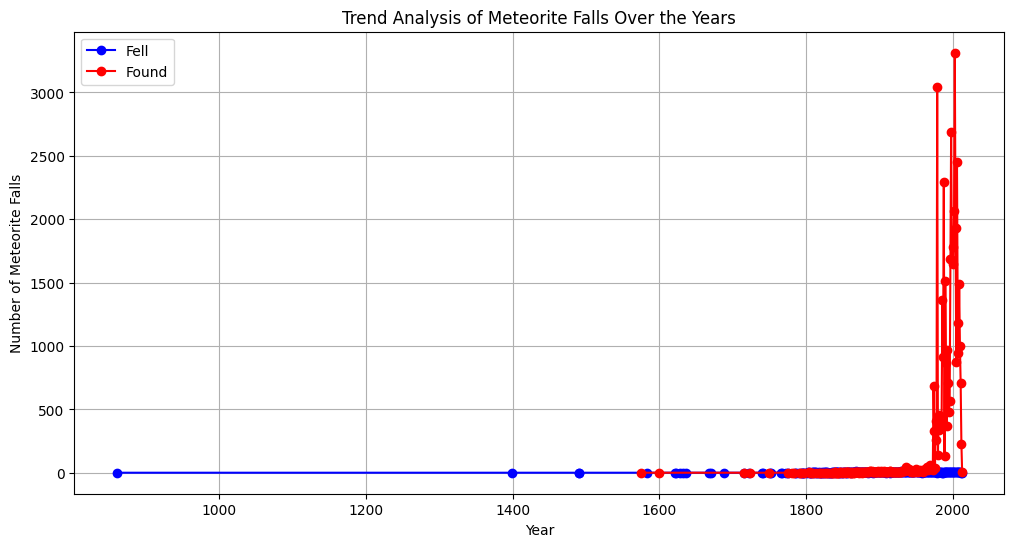

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Convert 'year' to integer
meteorite_data_clean['year'] = meteorite_data_clean['year'].astype(int)

# Meteor data for 'Fell' 
meteorite_data_found = meteorite_data_clean[meteorite_data_clean['fall'] == 'Found']

# Meteor data for 'Found'
meteorite_data_fell = meteorite_data_clean[meteorite_data_clean['fall'] == 'Fell']


# Count the number of meteorite falls per year where column Fall = Fell
meteorite_falls_per_year = meteorite_data_fell['year'].value_counts().sort_index()

#Count the number of meteorite falls per year where column Fall = Found
meteorite_falls_found_per_year = meteorite_data_found['year'].value_counts().sort_index()

# Plot the trend of meteorite falls and found over the years
plt.figure(figsize=(12, 6))
plt.plot(meteorite_falls_per_year.index, meteorite_falls_per_year.values, marker='o', linestyle='-', color='b', label='Fell')
plt.plot(meteorite_falls_found_per_year.index, meteorite_falls_found_per_year.values, marker='o', linestyle='-', color='r', label='Found')
plt.legend()
plt.title('Trend Analysis of Meteorite Falls Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Meteorite Falls')
plt.grid(True)
plt.show()

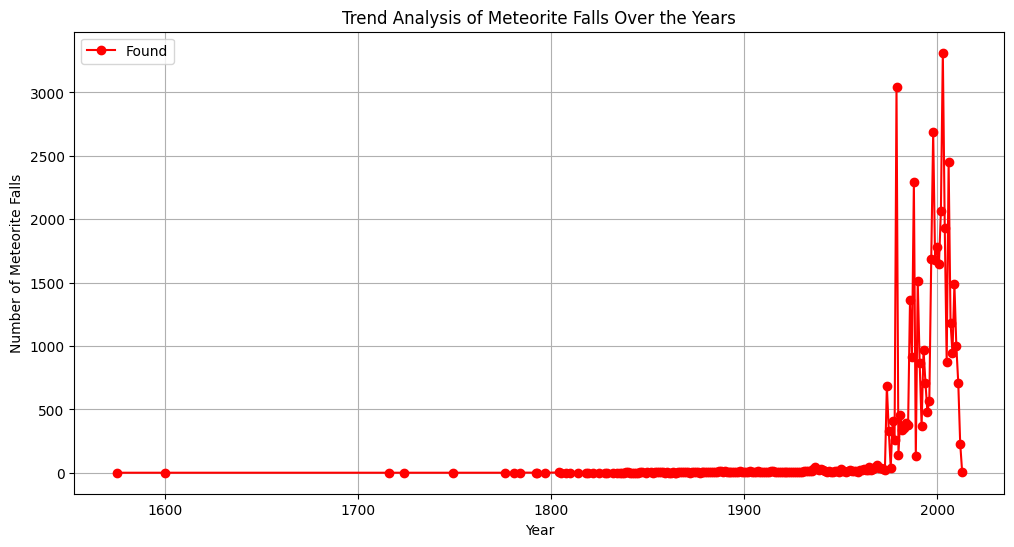

In [11]:
#PLotting on only the found data
plt.figure(figsize=(12, 6))
plt.plot(meteorite_falls_found_per_year.index, meteorite_falls_found_per_year.values, marker='o', linestyle='-', color='r', label='Found')
plt.legend()
plt.title('Trend Analysis of Meteorite Falls Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Meteorite Falls')
plt.grid(True)
plt.show()

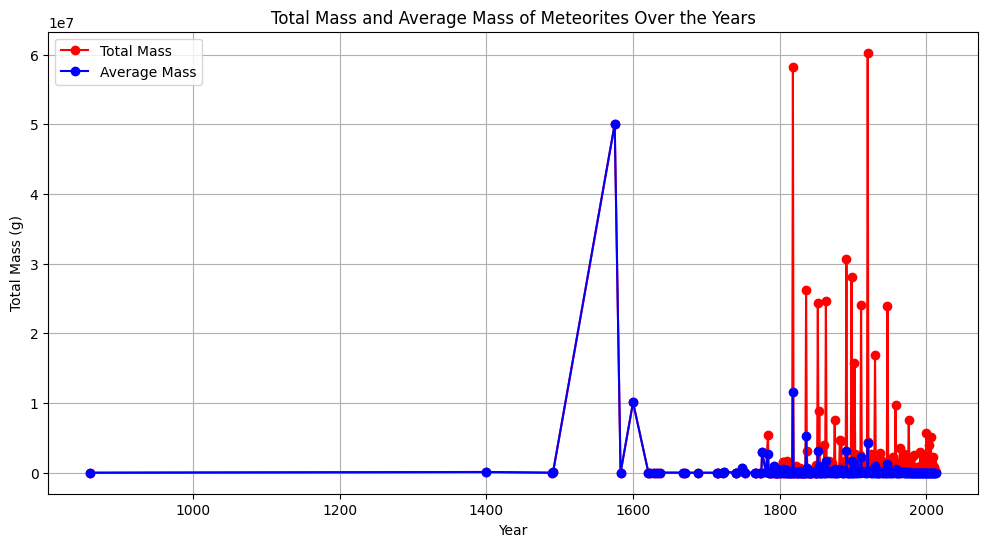

In [12]:
# Remove rows with missing 'mass (g)' values and convert to float
meteorite_data_clean['mass (g)'] = meteorite_data_clean['mass (g)'].astype(float)

# Aggregate the total mass of meteorites per year
total_mass_per_year = meteorite_data_clean.groupby('year')['mass (g)'].sum()

# Average mass of meteorites per year
average_mass_per_year = meteorite_data_clean.groupby('year')['mass (g)'].mean()



# Plot the total and mass of meteorites over the years
plt.figure(figsize=(12, 6))
plt.plot(total_mass_per_year.index, total_mass_per_year.values, marker='o', linestyle='-', color='r', label='Total Mass')
plt.plot(average_mass_per_year.index, average_mass_per_year.values, marker='o', linestyle='-', color='b', label='Average Mass')
plt.legend()
plt.title('Total Mass and Average Mass of Meteorites Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Mass (g)')
plt.grid(True)
plt.show()

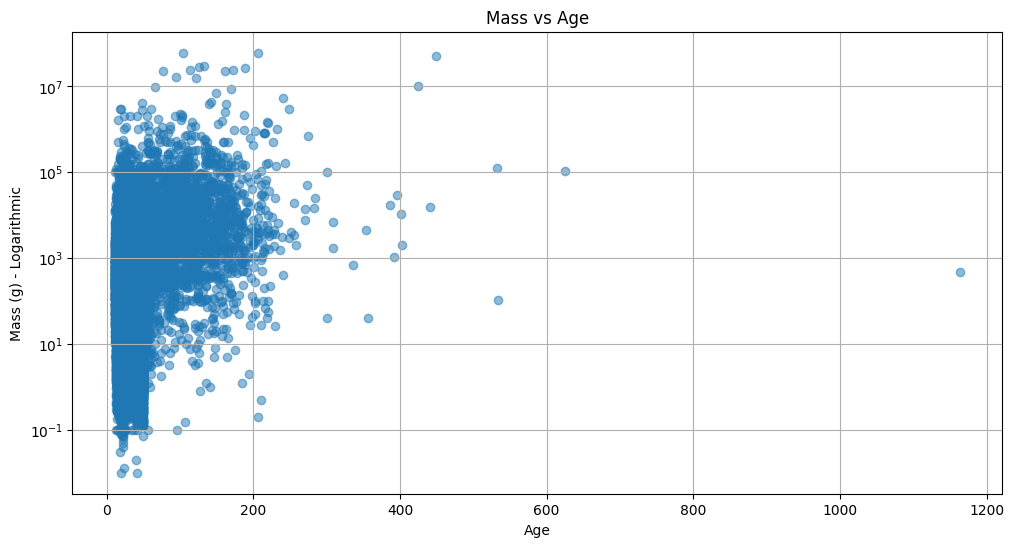

In [13]:
#plot mass vs age for valid meteorites
plt.figure(figsize=(12, 6))
plt.scatter(meteorite_data_clean['age'], meteorite_data_clean['mass (g)'], alpha=0.5)
plt.title('Mass vs Age')
plt.xlabel('Age')
plt.ylabel('Mass (g) - Logarithmic')
plt.yscale('log')
plt.grid(True)
plt.show()

Geospactial Analysis

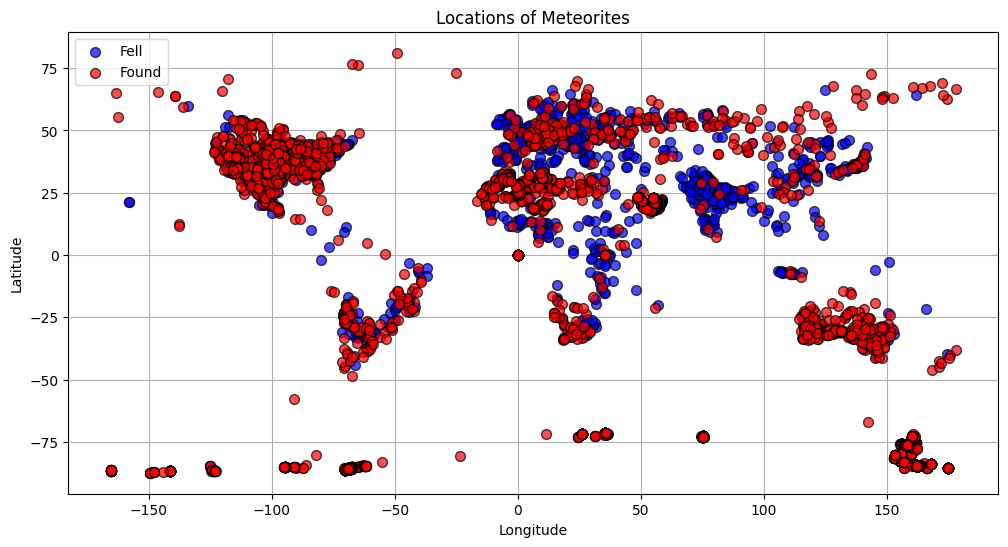

In [14]:
#plot locations of meteorites
plt.figure(figsize=(12, 6))
plt.scatter(meteorite_data_fell['reclong'], meteorite_data_fell['reclat'], s=50, c='blue', marker='o', alpha=0.7, edgecolors='k', zorder=5, label='Fell')
plt.scatter(meteorite_data_found['reclong'], meteorite_data_found['reclat'], s=50, c='red', marker='o', alpha=0.7, edgecolors='k', zorder=5, label='Found')
plt.title('Locations of Meteorites')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


Correlation Analysis

In [15]:
import pandas as pd

# Assuming you have already defined meteorite_data_clean DataFrame

# Calculate correlation between mass and reclong
corr_mass_reclong = meteorite_data_clean['mass (g)'].corr(meteorite_data_clean['reclong'])

# Calculate correlation between mass and reclat
corr_mass_reclat = meteorite_data_clean['mass (g)'].corr(meteorite_data_clean['reclat'])

corr_mass_year = meteorite_data_clean['mass (g)'].corr(meteorite_data_clean['age'])

#Encode the 'recclass' column
meteorite_data_clean['recclass_encoded'] = meteorite_data_clean['recclass'].astype('category').cat.codes
corr_mass_reclass = meteorite_data_clean['mass (g)'].corr(meteorite_data_clean['recclass_encoded'])

print("Correlation between mass and reclong:", corr_mass_reclong)
print("Correlation between mass and reclat:", corr_mass_reclat)
print("Correlation between mass and year:", corr_mass_year)
print("Correlation between mass and recclass:", corr_mass_reclass)
meteorite_data_clean['contains_iron'] = meteorite_data_clean['recclass'].str.contains('Iron', case=False)

# 2. Calculate correlation
correlation = meteorite_data_clean['mass (g)'].corr(meteorite_data_clean['contains_iron'].astype(int))

print(f"Correlation between mass and containing 'Iron' in recclass: {correlation}")




Correlation between mass and reclong: -0.02186243496833126
Correlation between mass and reclat: 0.02928898638190097
Correlation between mass and year: 0.12089896240855016
Correlation between mass and recclass: -0.005931853008188786
Correlation between mass and containing 'Iron' in recclass: 0.12846583462196345


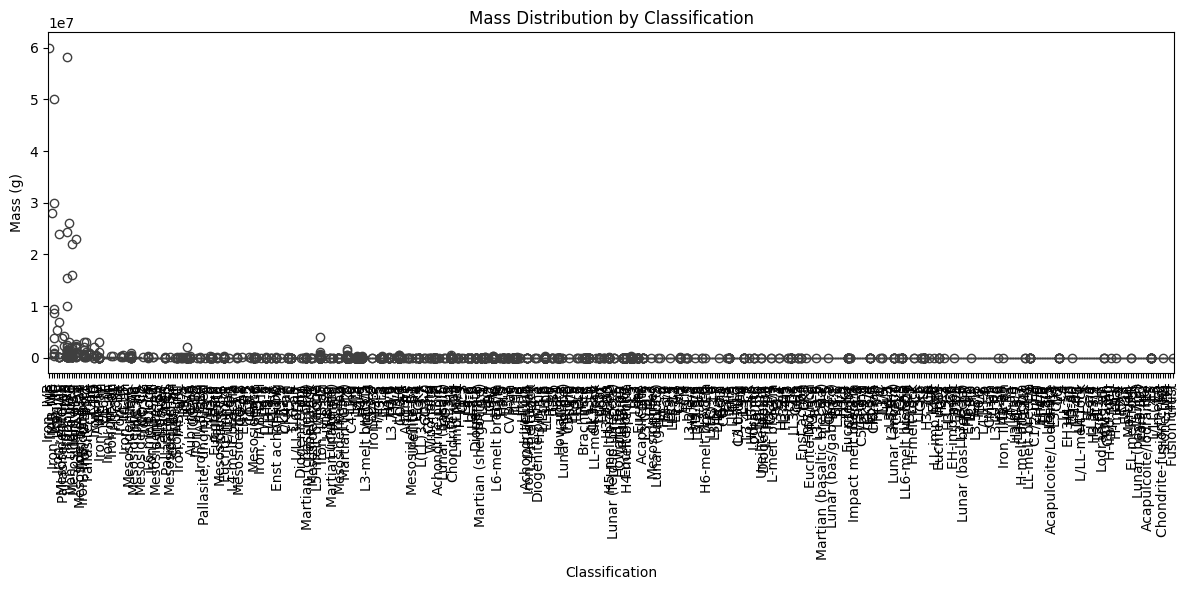

/var/folders/00/bjh5xtqj4pqbf8xpdtdn48h00000gn/T/ipykernel_31541/2734931205.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


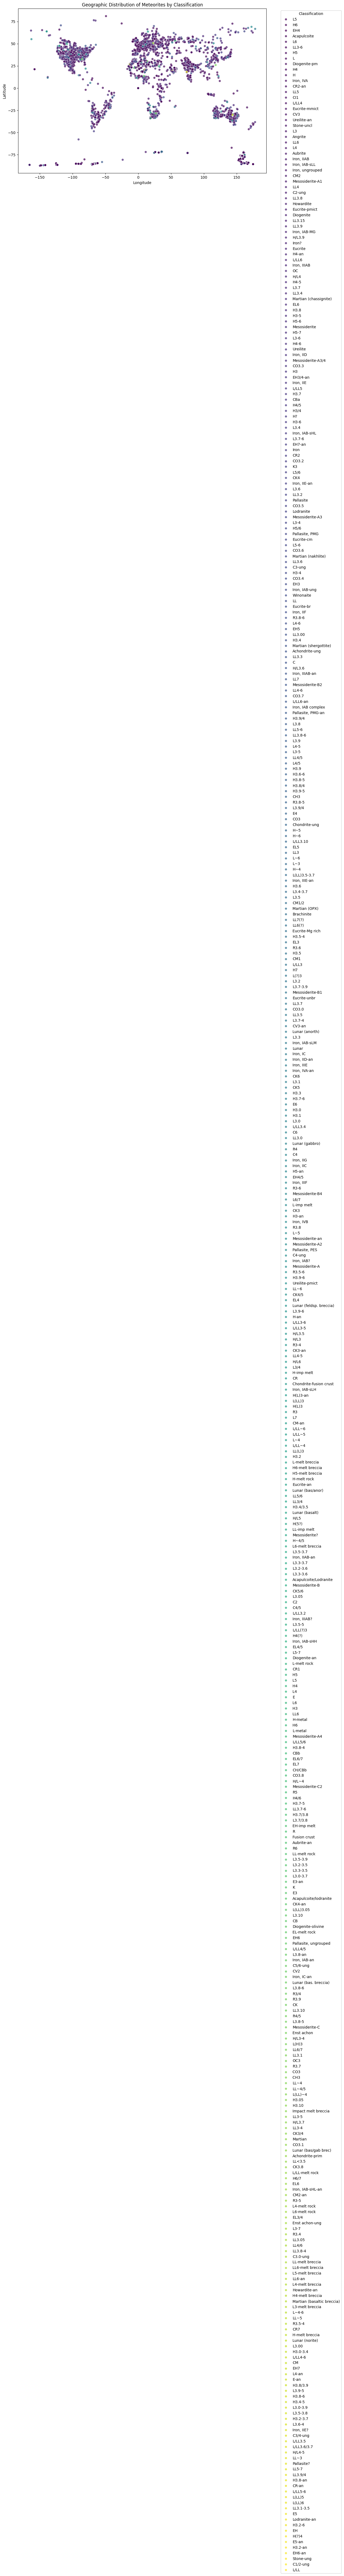

Correlation between mass and latitude: 0.02928898638190097


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming meteorite_data_clean is your DataFrame

# 1. Group by 'recclass' and analyze mass
mass_summary = meteorite_data_clean.groupby('recclass')['mass (g)'].describe()

# 2. Plot mass distribution by classification
plt.figure(figsize=(12, 6))
sns.boxplot(x='recclass', y='mass (g)', data=meteorite_data_clean, order=mass_summary.sort_values(by='mean', ascending=False).index)
plt.xticks(rotation=90)
plt.title('Mass Distribution by Classification')
plt.xlabel('Classification')
plt.ylabel('Mass (g)')
plt.tight_layout()
plt.show()

# 3. Plot geographic distribution by classification (assuming latitude and longitude are columns in your DataFrame)
plt.figure(figsize=(12, 8))
sns.scatterplot(y='reclat', x='reclong', hue='recclass', data=meteorite_data_clean, palette='viridis', alpha=0.7)
plt.title('Geographic Distribution of Meteorites by Classification')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. Correlation between mass and geographic location (example: latitude)
correlation = meteorite_data_clean['mass (g)'].corr(meteorite_data_clean['reclat'])
print(f"Correlation between mass and latitude: {correlation}")
